## Problem Statement:

* Customer churn is when a company’s customers stop doing business with that company.Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

* Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them.

* Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

* So here we need to predict whether customer is churned or not and that's our target variable.

Importing the required libraries for this dataset / project,

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [2]:
cc = pd.read_csv('Telecom_customer_churn.csv')
cc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


There are 7043 rows and 21 columns in the dataset and most of the columns are categorical data and we have 3 columns as numerical data.

We will check whether dataset is having null values or not.

The below given info() method describes the each column in a dataset and gives information about the non null count and index entries which is rows and column values,memory usage and thier datatypes.

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking the null values present in dataset and luckily we don't have any null values in dataset and it's a good thing that data is almost cleaned.

As we have categorical data's in our given dataset and our target variable is also a category variable (Yes / No) ,So our problem is Classification Problem(Binary).

In [4]:
cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So as almost all our columns in the dataset's are categorical data, We will look into the part of converting category into numerical in later part.

Before going to that part, We should know that what kind of values present in our dataset to proceed for converting categorical to numerical.

So Here I am using simple countplot to see how the data has been distributed.

MonthlyCharges && TotalCharges && SeniorCitizen are numerical columns in our dataset.We will see about this as well

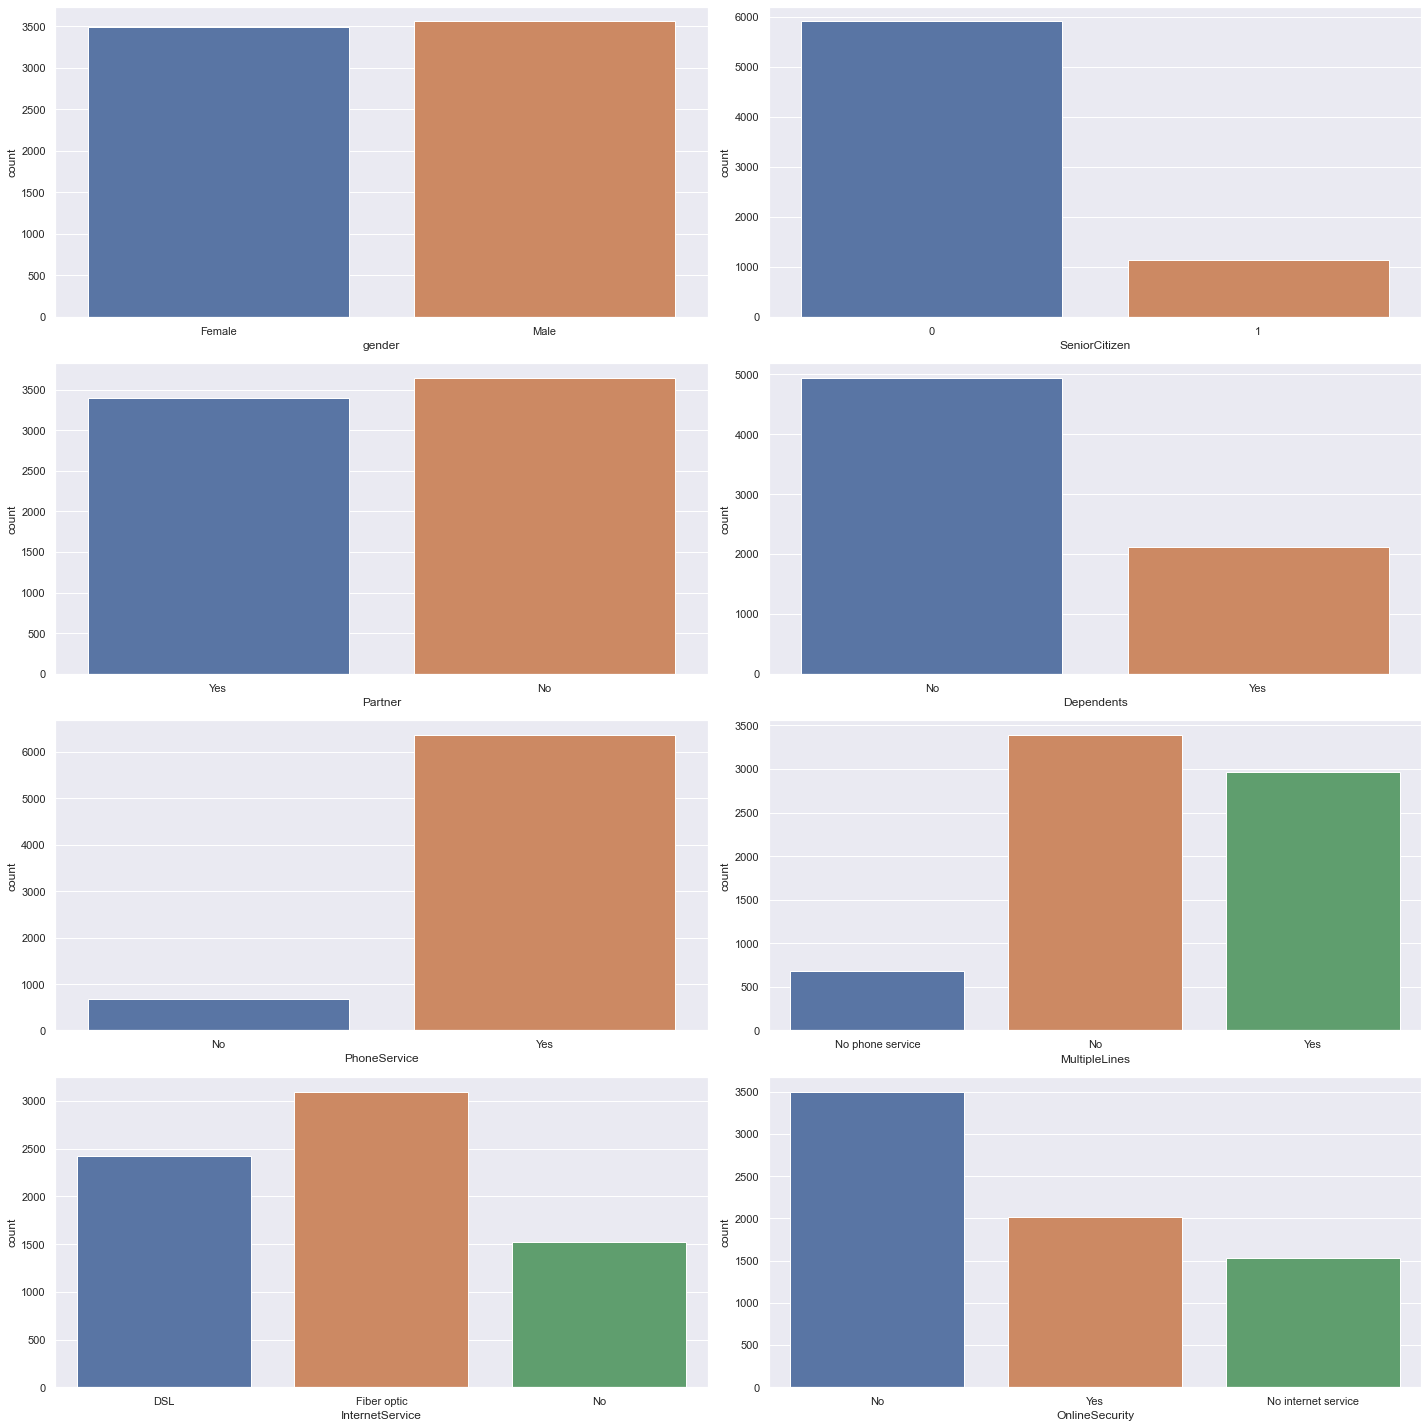

In [5]:
sns.set_theme()
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
sns.countplot(x = cc['gender'])
plt.tight_layout()
plt.subplot(4,2,2)
sns.countplot(x = cc['SeniorCitizen'])
plt.tight_layout()
plt.subplot(4,2,3)
sns.countplot(x = cc['Partner'])
plt.tight_layout()
plt.subplot(4,2,4)
sns.countplot(x = cc['Dependents'])
plt.tight_layout()
plt.subplot(4,2,5)
sns.countplot(x = cc['PhoneService'])
plt.tight_layout()
plt.subplot(4,2,6)
sns.countplot(x = cc['MultipleLines'])
plt.tight_layout()
plt.subplot(4,2,7)
sns.countplot(x = cc['InternetService'])
plt.tight_layout()
plt.subplot(4,2,8)
sns.countplot(x = cc['OnlineSecurity'])
plt.tight_layout()


* We can see that GENDER has two values Yes or No and that shows that customer is a male /female.

* SENIOR CITIZEN already has numerical value which is 1 or 0 that explains whether the customer is a sr.citizen or not

* Column PARTNER has Yes or No which describes whether customer has partner or not.

* DEPENDANTS - explains whether customer has any dependent or not and the values are Yes or No.

* Customer has any PHONE SERVICVE or not that shows Yes or No.

* Customer has MULTIPLE LINES or not and has values as Yes or No or No Internet services.

* Same goes for PHONE SERVICE as well as it has DSL, Fiber Optic, No

* Whether Customer has online security or not and it has Yes or No or No Internet services.

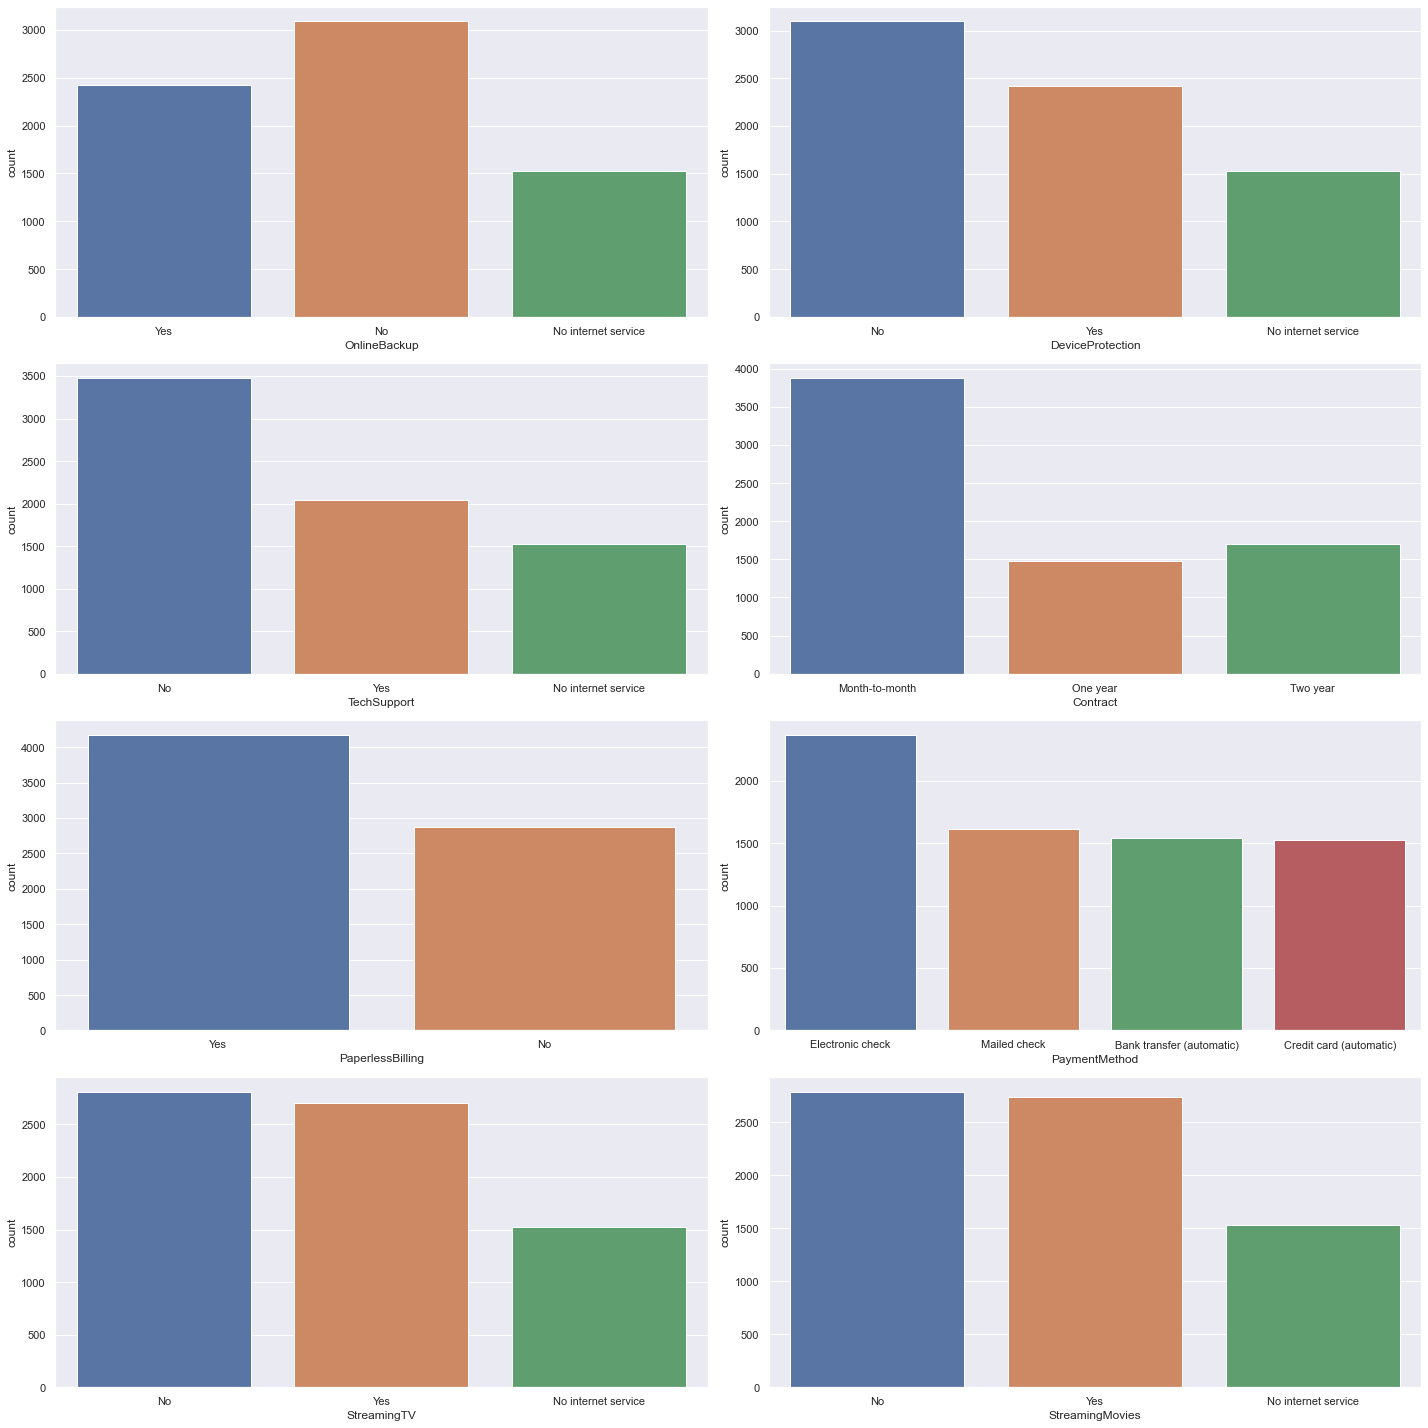

In [6]:
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
sns.countplot(x = cc['OnlineBackup'])
plt.tight_layout()
plt.subplot(4,2,2)
sns.countplot(x = cc['DeviceProtection'])
plt.tight_layout()
plt.subplot(4,2,3)
sns.countplot(x = cc['TechSupport'])
plt.tight_layout()
plt.subplot(4,2,4)
sns.countplot(x = cc['Contract'])
plt.tight_layout()
plt.subplot(4,2,5)
sns.countplot(x = cc['PaperlessBilling'])
plt.tight_layout()
plt.subplot(4,2,6)
sns.countplot(x = cc['PaymentMethod'])
plt.tight_layout()
plt.subplot(4,2,7)
sns.countplot(x = cc['StreamingTV'])
plt.tight_layout()
plt.subplot(4,2,8)
sns.countplot(x = cc['StreamingMovies'])
plt.tight_layout()


From the above plot,

* OnlineBackup, StreamingMovies, StreamingTV,TechSupport , DeviceProtection has values of Yes, No, No Internet Service and the customers has either one of the values.

* Other than that, PaperlessBilling explains that whether customer has paperless billing or not which is yes / No.

* Also we have PaymentMethod which has options fopr customers to pay their bill through any one of the ways - Electronic check, mailed check, bank Transfer (automatic), Credit card(automatic)

* Contract explains the time period for the customers with the company - Month-to-Month, One Year, Two Year.


As we can see that TotalCharges has numerical values and I am converting the data types into numeric.

In [7]:
cc['TotalCharges'].value_counts()

20.2      11
          11
19.75      9
19.9       8
19.65      8
          ..
97.5       1
811.65     1
6841.3     1
129.2      1
1354.4     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
cc['TotalCharges'] = pd.to_numeric(cc['TotalCharges'] , errors = 'coerce')

In [9]:
cc['TotalCharges'].isnull().sum()

11

So after converting the data type from object to numeric, we are get7ting NAN values and I am going to replace this missing values into median/ mean.

In [10]:
cc['TotalCharges'] = cc['TotalCharges'].fillna(cc['TotalCharges'].median())

<AxesSubplot:xlabel='TotalCharges'>

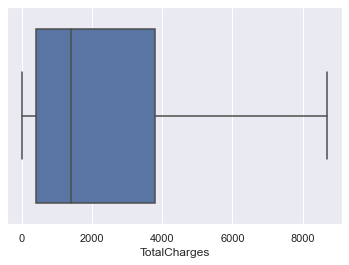

In [11]:
sns.boxplot(cc['TotalCharges'])

As from the above box plot, there is no outliers exist in TotalCharges column.

In [12]:
cc['TotalCharges'].isnull().sum()

0

So now the null values has been treated.

<AxesSubplot:xlabel='MonthlyCharges'>

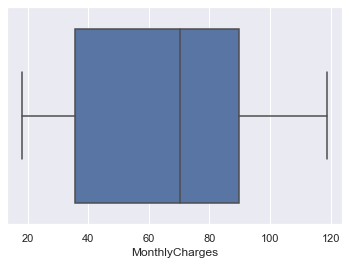

In [13]:
sns.boxplot(cc['MonthlyCharges'])

MonthlyCharges is numerical and this is also good and doesn't have any outliers.So we are good at numerical columns in this dataset.

Let's check our target Variable and we can see that there is class im-balanced in our target variables.
We will handle at the time of Splitting of X and Y varibles.

In [14]:
cc['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

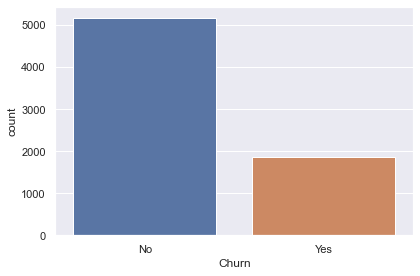

In [15]:
sns.countplot(cc['Churn'])
plt.tight_layout()
plt.show()

As I said earlier, We have more categorical varibales in the dataset, I am using replace() method to change YES && NO values into 1 && 0.

In [16]:
cc['gender'] = cc['gender'].replace({'Female':1, 'Male':0})
cc['Partner'] = cc['Partner'].replace({'Yes':1, 'No':0})
cc['Dependents'] = cc['Dependents'].replace({'Yes':1, 'No':0})
cc['PhoneService'] = cc['PhoneService'].replace({'Yes':1, 'No':0})
cc['PaperlessBilling'] = cc['PaperlessBilling'].replace({'Yes':1, 'No':0})
cc['Churn'] = cc['Churn'].replace({'Yes':1, 'No':0})

In [17]:
le = LabelEncoder()
cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for i in cols:
    cc[cols] = cc[cols].apply(le.fit_transform)

The categorical dats has been treated and we can see that through info() method,

In [18]:
cc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


Splitting x and y variables,

I am dropping CustomerID as it won't have any effect on the dataset.

In [19]:
X = cc.drop(columns = ['customerID','Churn'],axis = 1)
y = cc['Churn']

As our target variables are im-balanced as discussed earlier, Using SMOTE () method to balance the classes.

In [20]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(X,y)

Scaling the data as we have some numerical and catergorical data and has different ranges of values.So in - order to equalize the range, I am using Standard Scaler () method.

In [21]:
sca = StandardScaler()
x = sca.fit_transform(x_over)

Train Test Split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y_over, test_size = 0.25, random_state = 111)

So we have splitted the train and test dataset here and now we need to proceed for building the model and need to chose the best model based on accuracy.

As the target variable is im-balanced, We need to go for F1-Score accuracy for choosing the best model.

Apart from this, we are going to use cross validation score for all the model to check whether the the model is over fitting or under fitting.

Model 1: DECISION TREE CLASSIFIER

In [23]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score of DT :", scr_dt.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.7959106399091253
CV Score of DT : 0.7831568845833246
Accuracy score 
 0.7916505604947816
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1276
           1       0.79      0.80      0.80      1311

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

--------------------------------------------------------

Confusion Matrix 
 [[ 997  279]
 [ 260 1051]]
ROC AUC Score 
 0.7915130353483544


Model 2: Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
scr_lr = cross_val_score(lr,x_over,y_over,cv=5)



print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score of DT :", scr_lr.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8135964912280701
CV Score of DT : 0.7889512775431199
Accuracy score 
 0.8028604561267878
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1276
           1       0.78      0.85      0.81      1311

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

--------------------------------------------------------

Confusion Matrix 
 [[ 964  312]
 [ 198 1113]]
ROC AUC Score 
 0.8022280725665876


Model 3: Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score of DT :", scr_rfc.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8505833646970267
CV Score of DT : 0.8382413030636284
Accuracy score 
 0.8465403942790878
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1276
           1       0.84      0.86      0.85      1311

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587

--------------------------------------------------------

Confusion Matrix 
 [[1060  216]
 [ 181 1130]]
ROC AUC Score 
 0.8463292277306323


Model 4: K Neighbors Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier


knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(x_train,y_train)
y_pred = knc.predict(x_test)
scr_knc = cross_val_score(knc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score of DT :", scr_knc.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8020086083213774
CV Score of DT : 0.7817958219214864
Accuracy score 
 0.7866254348666409
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1276
           1       0.76      0.85      0.80      1311

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

--------------------------------------------------------

Confusion Matrix 
 [[ 917  359]
 [ 193 1118]]
ROC AUC Score 
 0.7857180859331101


Model 5: Ada Boost Classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier


abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test) 
scr_abc = cross_val_score(abc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score of DT :", scr_abc.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8255474452554744
CV Score of DT : 0.8097299215705502
Accuracy score 
 0.8152299961345187
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1276
           1       0.79      0.86      0.83      1311

    accuracy                           0.82      2587
   macro avg       0.82      0.81      0.81      2587
weighted avg       0.82      0.82      0.81      2587

--------------------------------------------------------

Confusion Matrix 
 [[ 978  298]
 [ 180 1131]]
ROC AUC Score 
 0.8145789545418678


As per the cv score and f1 score difference,the model with less difference is considered as best model and we will be applying hyper parameter tuning to check the accuracy of score to get improve.

SO here DECISION TREE model is considered as best model.

ROC AUC CURVE for all Models-

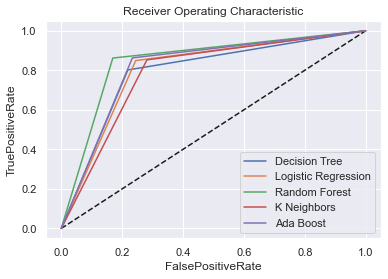

In [28]:
y_pred_prob1 = dt.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = lr.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = rfc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = knc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = abc.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "Random Forest")
plt.plot(fpr4, tpr4, label= "K Neighbors")
plt.plot(fpr5, tpr5, label= "Ada Boost")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

Applying Hyper Parameter Tuning,

In [29]:
param = {'criterion' : ['gini','entropy'] ,
         'splitter': ['best','random'], 
         'max_depth':[10,12,14,16,18,20,22,25],
         'random_state' : [None],
         'max_leaf_nodes': [10,12,14,16,18],
         'min_samples_leaf':[2,4,6,8,10,12],
                   }

In [31]:
grid = GridSearchCV(dt,param_grid = param, cv= 5)

In [32]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16, 18, 20, 22, 25],
                         'max_leaf_nodes': [10, 12, 14, 16, 18],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12],
                         'random_state': [None],
                         'splitter': ['best', 'random']})

In [33]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 18,
 'min_samples_leaf': 2,
 'random_state': None,
 'splitter': 'best'}

In [36]:
final = DecisionTreeClassifier(criterion = 'gini',max_depth = 10,max_leaf_nodes = 18, min_samples_leaf=2, random_state= None, splitter='best'  )
final.fit(x_train,y_train)
y_pred = final.predict(x_test)


print("F1 score \n", f1_score(y_test,y_pred))
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.806122448979592
Accuracy score 
 0.8090452261306532
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1276
           1       0.83      0.78      0.81      1311

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587

--------------------------------------------------------

Confusion Matrix 
 [[1066  210]
 [ 284 1027]]
ROC AUC Score 
 0.8093973348254103


So our model has increased the accuracy from 78 to 81 %.If we change the parameter and its values, we will achieve with good accuracy.

ROC CURVE for final model

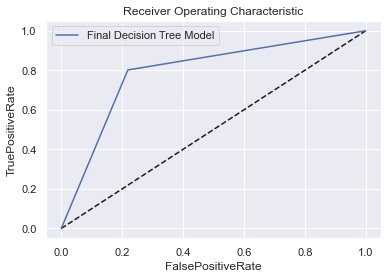

In [37]:
y_pred_fin = final.predict(x_test)
fpr , tpr, thresholds = roc_curve(y_test, y_pred_fin)




plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Final Decision Tree Model")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

Saving the model .pkl file

In [38]:
import joblib
joblib.dump(final,"Customer_churn.pkl")

['Customer_churn.pkl']